In [1]:
from google.colab import files
files.upload()  # Upload your Kaggle JSON file


{}

In [2]:
!pip install pandas numpy seaborn nltk wordcloud textblob gensim spacy plotly
!python -m spacy download en_core_web_sm


Traceback (most recent call last):
  File "<frozen runpy>", line 189, in _run_module_as_main
  File "<frozen runpy>", line 148, in _get_module_details
  File "<frozen runpy>", line 112, in _get_module_details
  File "/usr/local/lib/python3.11/dist-packages/spacy/__init__.py", line 16, in <module>
    from .cli.info import info  # noqa: F401
    ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/spacy/cli/__init__.py", line 4, in <module>
    from . import download as download_module  # noqa: F401
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/spacy/cli/download.py", line 5, in <module>
    import requests
  File "/usr/local/lib/python3.11/dist-packages/requests/__init__.py", line 164, in <module>
    from .api import delete, get, head, options, patch, post, put, request
  File "/usr/local/lib/python3.11/dist-packages/requests/api.py", line 11, in <module>
    from . import sessions
  File "/usr/local/lib/python3.11/

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d kazanova/sentiment140
!unzip sentiment140.zip


Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
sentiment140.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  sentiment140.zip
replace training.1600000.processed.noemoticon.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: training.1600000.processed.noemoticon.csv  


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
import spacy
import gensim
import plotly.express as px
from wordcloud import WordCloud
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel

# Download necessary NLP resources
nltk.download("stopwords")
nltk.download("vader_lexicon")

# Load English NLP model
nlp = spacy.load("en_core_web_sm")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [5]:
df = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding="ISO-8859-1", names=["sentiment", "id", "date", "query", "user", "text"])
df = df[["sentiment", "text"]]  # Keep only necessary columns
df["sentiment"] = df["sentiment"].map({0: "Negative", 4: "Positive"})  # Convert labels
df.head()


,sentiment,text
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,is upset that he can't update his Facebook by ...
2,Negative,@Kenichan I dived many times for the ball. Man...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"@nationwideclass no, it's not behaving at all...."


In [6]:
stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r"@\w+|#", "", text)  # Remove mentions and hashtags
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    text = " ".join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

df["clean_text"] = df["text"].apply(clean_text)
df.head()


,sentiment,text,clean_text
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",thats bummer shoulda got david carr third day
1,Negative,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...
2,Negative,@Kenichan I dived many times for the ball. Man...,dived many times ball managed save 50 rest go ...
3,Negative,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,Negative,"@nationwideclass no, it's not behaving at all....",behaving im mad cant see


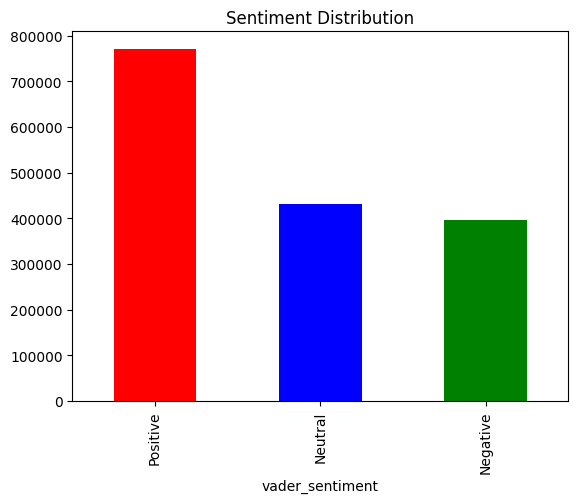

In [7]:
sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = sia.polarity_scores(text)["compound"]
    return "Positive" if score > 0 else "Negative" if score < 0 else "Neutral"

df["vader_sentiment"] = df["clean_text"].apply(get_sentiment)
df["vader_sentiment"].value_counts().plot(kind="bar", color=["red", "blue", "green"])
plt.title("Sentiment Distribution")
plt.show()


In [8]:
def preprocess_for_lda(text):
    doc = nlp(text)
    return [token.lemma_ for token in doc if token.is_alpha and token.text not in stop_words]

df["tokens"] = df["clean_text"].apply(preprocess_for_lda)

dictionary = Dictionary(df["tokens"])
corpus = [dictionary.doc2bow(text) for text in df["tokens"]]

lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)
lda_model.show_topics()


KeyboardInterrupt: 

In [9]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(df["clean_text"]))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


KeyboardInterrupt: 